## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
mice_df["Mouse ID"].nunique()

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mice_df.groupby("Mouse ID")
dupes_df = dupes['Timepoint'].value_counts()
dupes_df[dupes_df > 1]

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Timepoint, dtype: int64

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_df.loc[mice_df["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = mice_df.loc[mice_df["Mouse ID"] != "g989", :]

In [50]:
# Checking the number of mice in the clean DataFrame.
mice_df["Mouse ID"].nunique()

248

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

stats = mice_df.groupby('Drug Regimen')

tumor_mean = stats['Tumor Volume (mm3)'].mean()
tumor_median = stats['Tumor Volume (mm3)'].median()
tumor_var = stats['Tumor Volume (mm3)'].var()
tumor_std = stats['Tumor Volume (mm3)'].std()
tumor_sem = stats['Tumor Volume (mm3)'].sem()

stats_df = pd.DataFrame({'Mean':tumor_mean,
                         'Median':tumor_median,
                         'Variance':tumor_var,
                         'Std Dev':tumor_std,
                         'Std Error':tumor_sem
                        })
stats_df

,Mean,Median,Variance,Std Dev,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

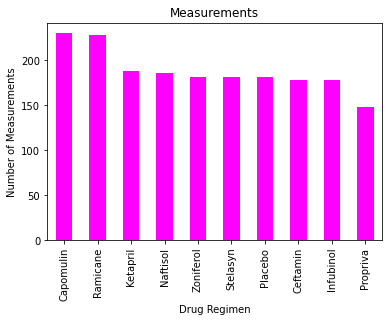

In [100]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts = mice_df['Drug Regimen'].value_counts()
drug_counts.plot(kind="bar", facecolor="magenta")
plt.title("Measurements")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")


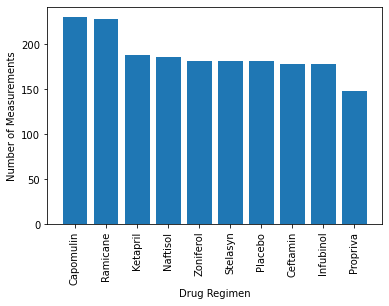

In [98]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = drug_counts.index
x_axis = range(len(drugs))

plt.bar(x_axis,drug_counts, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation='vertical')

plt.show()


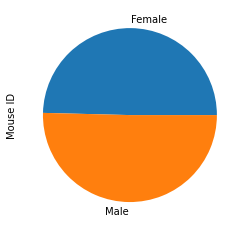

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# There are 123 females and 125 males
mouse_gender = mice_df.groupby('Sex')
gender_dist = mouse_gender["Mouse ID"].nunique()

gender_dist.plot(kind="pie")


([<matplotlib.patches.Wedge at 0x231dc99f5b0>,
 [Text(-0.7176837777416648, -0.8336246128602807, 'Female'),
  Text(0.7176837777416649, 0.8336246128602806, 'Male')],
 [Text(-0.39146387876818073, -0.45470433428742574, '49.6%'),
  Text(0.39146387876818084, 0.4547043342874257, '50.4%')])

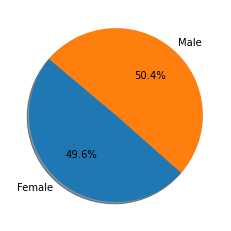

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_dist.index

plt.pie(gender_dist, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
